## examine_functions.ipynb
### WESmith 05/17/20

In [48]:
import pyphi as pp
import numpy as np
import phial.experiment as ex
import itertools as it
import pandas as pd

# 1) Vanilla pyphi test to reprodice Mayner 2018, Oizumi 2014 result

In [49]:
tpm = np.array([  # TPM, CM direct from 2018 paper: bidirectional XOR, OR, AND, 6 edges
    [0, 0, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])
cm = np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])
network = pp.Network(tpm, cm=cm, node_labels=['A', 'B', 'C'])             

In [50]:
nodes = ('A', 'B', 'C')
for state in it.product([0,1], repeat=3):
    try: 
        subsystem = pp.Subsystem(network, state, nodes)
        sia = pp.compute.sia(subsystem)
        print(state, sia.phi)
    except:
        print(state, 'unreachable')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]        

(0, 0, 0) 0.666668


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]       

(0, 0, 1) 0.25
(0, 1, 0) unreachable
(0, 1, 1) unreachable


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]       

(1, 0, 0) 1.916665


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]       

(1, 0, 1) 1.816667


Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

(1, 1, 0) 0.25


(1, 1, 1) 0.666668


## Summary: PHI of 1.916665 reproduced for state (1,0,0): agreement with Mayner (page 12/21), Oizumi (Fig 12 p. 14).

---

# 2) Reproduce same network with Experiment class

In [51]:
exp = ex.Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A='OR', B='AND', C='XOR'),
    saveDir='./foo',  # WS note: had to create foo dir: it didn't automatically create it
    title='3-node bidirectional; OR, XOR, AND',  
    comment = '',
)

Saved experiment with results to: foo/results_2020-05-17T11:09:28.173659.json


{'timestamp': '2020-05-17 11:09:26.881717',
 'duration': 1.0898144720122218,
 'results': {'010': {'phi': 0.243056, 'elapsed_seconds': 0.22644239399232902},
  '001': {'phi': 0.243056, 'elapsed_seconds': 0.2123872600204777},
  '100': {'phi': 0.243056, 'elapsed_seconds': 0.21735011102282442},
  '111': {'phi': 0.499999, 'elapsed_seconds': 0.22447323199594393},
  '000': {'phi': 0.194445, 'elapsed_seconds': 0.20754875399870798}},
 'connected_components': 2,
 'cycles': 2,
 'filename': None,
 'uname': uname_result(system='Linux', node='smithw-Aspire-E5-576G', release='4.15.0-99-generic', version='#100-Ubuntu SMP Wed Apr 22 20:32:56 UTC 2020', machine='x86_64', processor='x86_64')}

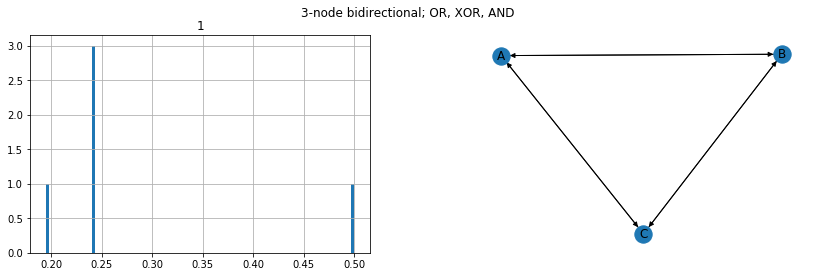

In [52]:
exp.run(plot=True)

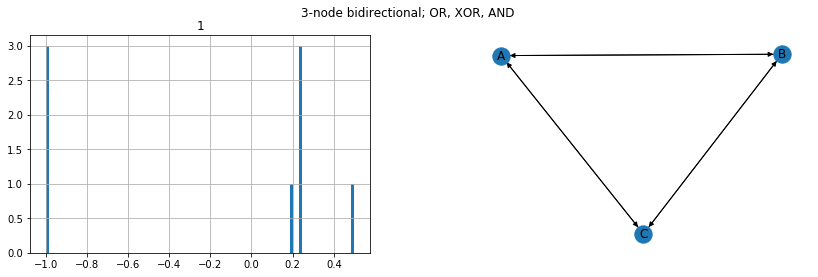

In [53]:
exp.analyze(countUnreachable=True)

## Summary: Results at variance with Mayner results. 

---

# Examine the functions at each node

In [54]:
# get number of functions available at each node
exp.get_num_funcs 

{'A': 16, 'B': 16, 'C': 16}

## NOTE
- producing 16 funcs for each node: why? each node has only 2 inputs, should be 8 funcs/node
- answer: 4 input states, 2^4 = 16: all possible outputs where ORDER OF INPUTS IS IMPORTANT
- only 8 of these funcs are INDEPENDENT of input order (eg, depend upon sum of inputs)

## This is at variance with earlier agreement that order of inputs is not important in node functions
- in generating tests, how does one select node functions whose ORDER OF INPUTS IS NOT IMPORTANT?

In [55]:
def test_func(fun, N):
    return pd.DataFrame([(k, (fun(k))) for k in it.product([0,1], repeat=N)])

In [56]:
# A should be 'or', B 'and', C 'xor': 
for k in ['A', 'B', 'C']:
    print(test_func(exp.net.get_node(k).func, 2))

        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  1
3  (1, 1)  1
        0  1
0  (0, 0)  0
1  (0, 1)  0
2  (1, 0)  0
3  (1, 1)  1
        0  1
0  (0, 0)  0
1  (0, 1)  1
2  (1, 0)  1
3  (1, 1)  0


# Summary: Each node has the correct node function. Unexplained why the variance with Mayner result: internal TPM constructed incorrectly?